# Problem Statement:
Fashion MNIST is a dataset comprising 60,000 training images and 10,000 testing images, each depicting various fashion items in a 28x28 grayscale format. The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can accurately classify these images into the correct fashion catego

In [ ]:
# importing Library
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Checking the Dataset Shape
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

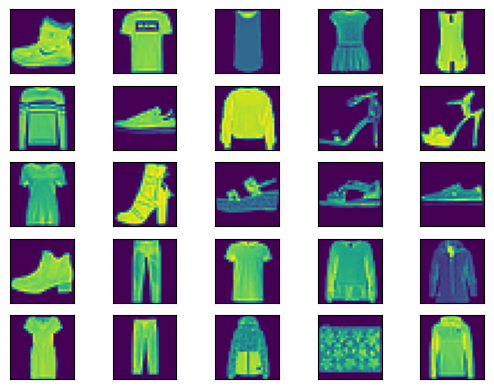

In [ ]:
# Visualize the Data
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])

In [ ]:
# normalize the train images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# One Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# create the modelb
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(train_images,train_labels,epochs=20,validation_split=0.2,batch_size=30,verbose=2)

Epoch 1/20
1600/1600 - 5s - 3ms/step - accuracy: 0.7520 - loss: 0.7731 - val_accuracy: 0.8006 - val_loss: 0.5739
Epoch 2/20
1600/1600 - 7s - 4ms/step - accuracy: 0.8219 - loss: 0.5286 - val_accuracy: 0.8217 - val_loss: 0.5061
Epoch 3/20
1600/1600 - 10s - 6ms/step - accuracy: 0.8345 - loss: 0.4798 - val_accuracy: 0.8357 - val_loss: 0.4709
Epoch 4/20
1600/1600 - 8s - 5ms/step - accuracy: 0.8423 - loss: 0.4537 - val_accuracy: 0.8427 - val_loss: 0.4490
Epoch 5/20
1600/1600 - 3s - 2ms/step - accuracy: 0.8499 - loss: 0.4342 - val_accuracy: 0.8437 - val_loss: 0.4388
Epoch 6/20
1600/1600 - 4s - 3ms/step - accuracy: 0.8547 - loss: 0.4198 - val_accuracy: 0.8515 - val_loss: 0.4295
Epoch 7/20
1600/1600 - 3s - 2ms/step - accuracy: 0.8584 - loss: 0.4070 - val_accuracy: 0.8543 - val_loss: 0.4145
Epoch 8/20
1600/1600 - 5s - 3ms/step - accuracy: 0.8617 - loss: 0.3967 - val_accuracy: 0.8588 - val_loss: 0.4060
Epoch 9/20
1600/1600 - 4s - 2ms/step - accuracy: 0.8639 - loss: 0.3877 - val_accuracy: 0.8612 -

In [ ]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8654 - loss: 0.3843
Test accuracy: 0.8622999787330627


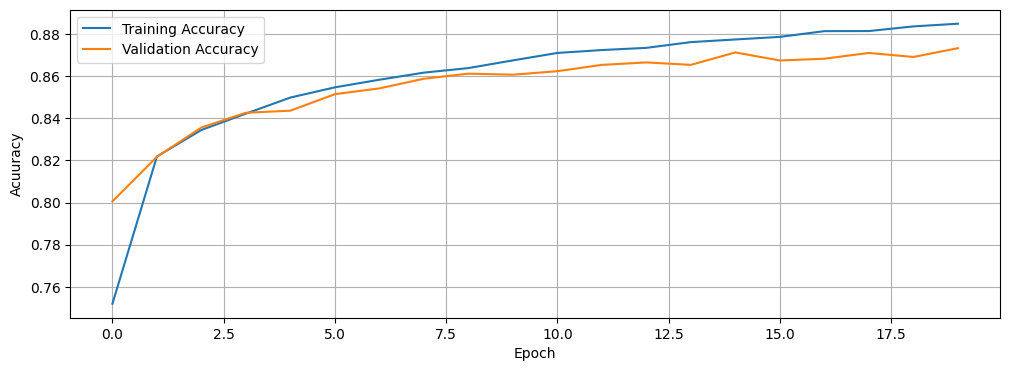

In [ ]:
# Plot training vs validation accuracy
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

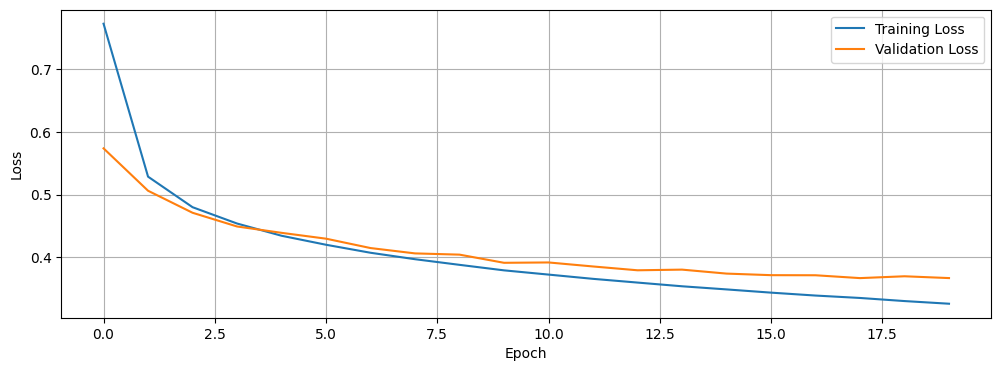

In [ ]:
# Plot training vs validation loss
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)